# Seongueol's Mask
Using the mask provided in the box files by Seongyeol, running OPAL on Rodan, generating an h5 file simulating the result, and plotting the result just after the mask (Step #16) I'm getting:

Data extraction started
<KeysViewHDF5 ['Step#0', 'Step#1', 'Step#10', 'Step#100', 'Step#101', 'Step#102', 'Step#103', 'Step#104', 'Step#105', 'Step#106', 'Step#107', 'Step#108', 'Step#109', 'Step#11', 'Step#110', 'Step#111', 'Step#112', 'Step#113', 'Step#114', 'Step#115', 'Step#116', 'Step#117', 'Step#118', 'Step#119', 'Step#12', 'Step#120', 'Step#121', 'Step#122', 'Step#123', 'Step#124', 'Step#125', 'Step#126', 'Step#127', 'Step#128', 'Step#129', 'Step#13', 'Step#130', 'Step#131', 'Step#132', 'Step#133', 'Step#134', 'Step#135', 'Step#136', 'Step#137', 'Step#138', 'Step#139', 'Step#14', 'Step#140', 'Step#141', 'Step#142', 'Step#143', 'Step#144', 'Step#145', 'Step#146', 'Step#147', 'Step#148', 'Step#149', 'Step#15', 'Step#150', 'Step#151', 'Step#152', 'Step#153', 'Step#154', 'Step#155', 'Step#156', 'Step#157', 'Step#158', 'Step#159', 'Step#16', 'Step#160', 'Step#161', 'Step#162', 'Step#163', 'Step#164', 'Step#165', 'Step#166', 'Step#167', 'Step#168', 'Step#169', 'Step#17', 'Step#170', '

C:\Users\Captain\AppData\Local\Temp\ipykernel_4848\2023550172.py:157: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(Xedgesi, Yedgesi, H1, kind='cubic')
C:\Users\Captain\AppData\Local\Temp\ipykernel_4848\2023550172.py:162: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
    

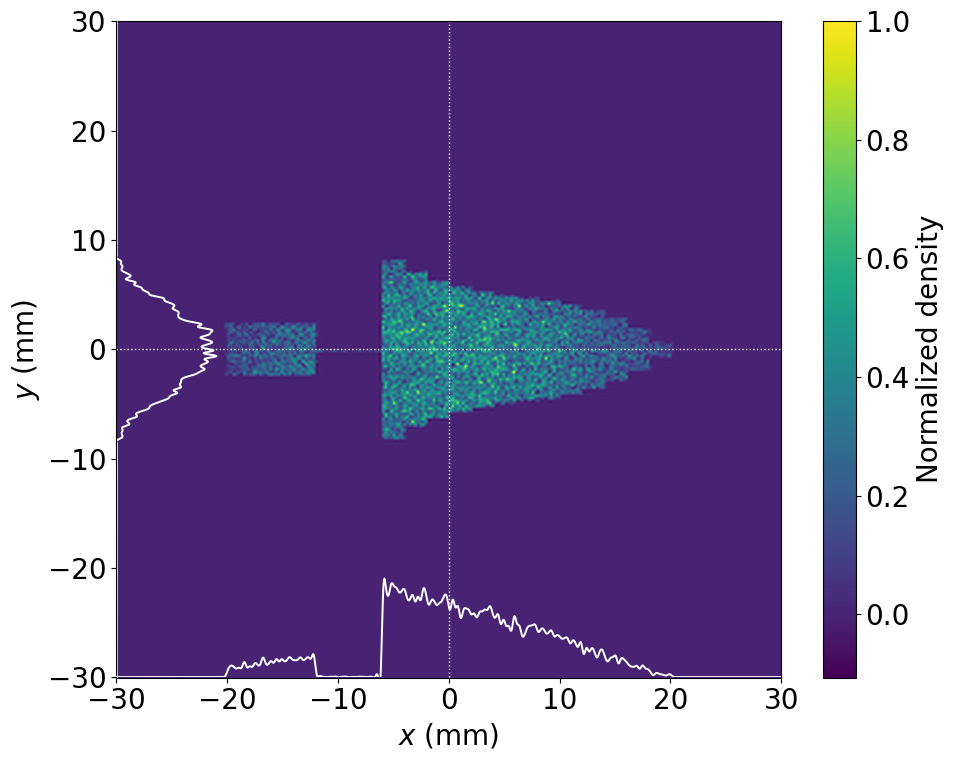

In [12]:
# =====================================================================
# =====================================================================
# LPS plotting
# =====================================================================
# =====================================================================
# LPS plotting
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
nullfmt = NullFormatter()         # no labels

# Import OPAL output data
# =====================================================================
# =====================================================================
# Directory
parent_dir = "A://PBPL//"

# File name
opalout = "input.h5"

# Data extraction
print("Data extraction started")
dataopal = h5py.File(parent_dir+opalout, 'r+')
dataopal.keys()
print(dataopal.keys())

step=  16

# Grid size
grid_z = 30
grid_d = 30


print(dataopal["Step#0"].attrs['RefPartR'][2])
print(dataopal["Step#0"].attrs.keys())

# Stepsize repository
stepdirx  = 'Step#'+str(step)+'/x'
stepdiry  = 'Step#'+str(step)+'/y'
stepdirz  = 'Step#'+str(step)+'/z'
stepdirpx = 'Step#'+str(step)+'/px'
stepdirpy = 'Step#'+str(step)+'/py'
stepdirpz = 'Step#'+str(step)+'/pz'

# Access to attribute data
pRef = dataopal['Step#'+str(step)+'/'].attrs['RefPartP'][2]
zRef = dataopal['Step#'+str(step)+'/'].attrs['RefPartR'][2]
print("position z is "+str(zRef) + " m.")


# Beam data 
x = dataopal.get(stepdirx)
X = np.array(x)

y = dataopal.get(stepdiry)
Y = np.array(y)

z = dataopal.get(stepdirz)
z = np.array(z)
Z = z-np.mean(z)

T = Z / 3e8

px= dataopal.get(stepdirpx)
px= np.array(px)

py= dataopal.get(stepdirpy)
py= np.array(py)

pz= dataopal.get(stepdirpz)
pz= np.array(pz)

# Divergence
xp = np.array(px) / pRef
yp = np.array(py) / pRef

sigx = np.sqrt( np.mean( ((x - np.mean(x))**2 )))*1e3
sigy = np.sqrt( np.mean( ((y - np.mean(y))**2 )))*1e3
sigz = np.sqrt( np.mean( ((z - np.mean(z))**2 )))*1e3


mean_xz=(np.mean((x-np.mean(x)) * z))
mean_xpz=(np.mean((xp-np.mean(xp)) * z))

# Fractional energy spread
delta = (pz - pRef) /pRef
delta = (pz - np.mean(pz)) / np.mean(pz)

# RMS energy spread
sigd = np.sqrt( np.mean( ((delta - np.mean(delta))**2 )))
print("Data extraction completed")


# =====================================================================
# =====================================================================
# Emittance calculation
print("Emittance calculation started")
emitx = np.sqrt( np.mean((x-np.mean(x))**2)*np.mean((xp-np.mean(xp))**2) - np.mean((x-np.mean(x))*(xp-np.mean(xp)))**2)
emity = np.sqrt( np.mean((y-np.mean(y))**2)*np.mean((yp-np.mean(yp))**2) - np.mean((y-np.mean(y))*(yp-np.mean(yp)))**2)

# Normalized emittance
enx = emitx * pRef
eny = emity * pRef


# =====================================================================
# =====================================================================
# Linear Twiss parameters from this setting
betax = (sigx**2)*1e-6 / emitx # since sigx is in mm unit
betay = (sigy**2)*1e-6 / emity

alphax= - (np.mean((x-np.mean(x))*(xp-np.mean(xp)))) / emitx
alphay= - (np.mean((y-np.mean(y))*(yp-np.mean(yp)))) / emity


# =====================================================================
# =====================================================================
# Define the x and y data 
# For example just using random numbers
x = np.array(x)*1e3
y = np.array(y)*1e3

# Estimate the 2D histogram
nbins = 251



# =====================================================================
# Mesh range for plotting
Xedges =  np.linspace(-grid_z, grid_z, nbins)
Yedges =  np.linspace(-grid_d, grid_d, nbins)

# 2D histogram: Initial processing
H, xedges, yedges = np.histogram2d(x,y,bins=(Xedges, Yedges))
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Noramalization
H1 = H / max(map(max, H))
print("Emittance calculation completed")

# =====================================================================
# Mesh range for interpolating
print("Interpolation started")
Xedgesi =  np.linspace(-grid_z, grid_z, nbins-1)
Yedgesi =  np.linspace(-grid_d, grid_d, nbins-1)

# Interpolation processing for 2D histogram
f = interp2d(Xedgesi, Yedgesi, H1, kind='cubic')

# New edges for interpolated data
Xedgesnew = np.linspace(-grid_z, grid_z, nbins*5)
Yedgesnew = np.linspace(-grid_d, grid_d, nbins*5)
H_interpolated = f(Xedgesnew, Yedgesnew)
# Normalization
H1_interpolated = H_interpolated / max(map(max, H_interpolated))
Xn, Yn = np.meshgrid(Xedgesnew, Yedgesnew)

# Projected histograms inx and y
hist_x, hist_y = H1_interpolated.sum(axis=0), H1_interpolated.sum(axis=1)

# Normalization
histx = hist_x / max(hist_x)
histy = hist_y / max(hist_y)

x_h = np.linspace(-grid_z, grid_z, len(Xn))
y_h = np.linspace(-grid_d, grid_d, len(Yn))
print("Interpolation completed")

# =====================================================================
# =====================================================================
# Plotting
print("Plotting started")

# Font size
fsize = 20
rc('figure', figsize = (10,8))
rc('axes', grid = False)
rc('lines', linewidth = 2, color = 'r')
rc('font', size = fsize)

# Image and histogram
fig, ax1 = plt.subplots()
#plt.text(-15, 0.6, r'$\mathrm{(c)}$', {'color': 'w', 'fontsize': 30})
plt.pcolormesh(Xn, Yn, H1_interpolated)
plt.plot([0,0],[-grid_d, grid_d], ':', linewidth=1.0, color=(1,1,1))
plt.plot([-grid_z, grid_z],[0,0], ':', linewidth=1.0, color=(1,1,1))
plt.set_cmap('viridis')
#plt.pcolormesh(Xn, Yn, data1)
plt.xlabel('$x$ (mm)', fontsize=fsize)
plt.ylabel('$y$ (mm)', fontsize=fsize)
#plt.ylabel('$x\'$ (mrad)', fontsize=fsize)
cbar = plt.colorbar()
#plt.clim([0.5,1])
cbar.ax.set_ylabel('Normalized density', fontsize=fsize)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip1 = InsetPosition(ax1, [0.0, 0.001, 1.0, 0.3])
ax2.set_axes_locator(ip1)

# The data: only display for low temperature in the inset figure.
ax2.plot(x_h, histx/2, '-', linewidth=1.4, color=(1,1,1))
ax2.axis([-grid_z, grid_z, 0, 1])
ax2.axis('off')

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax3 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip3 = InsetPosition(ax1, [0.001, 0.0, 0.3, 1.0])
ax3.set_axes_locator(ip3)

# The data: only display for low temperature in the inset figure.
ax3.plot(histy/2, y_h, '-', linewidth=1.4, color=(1,1,1))
ax3.axis([0, 1, -grid_d, grid_d])
ax3.axis('off')
plt.tight_layout()
plt.show()

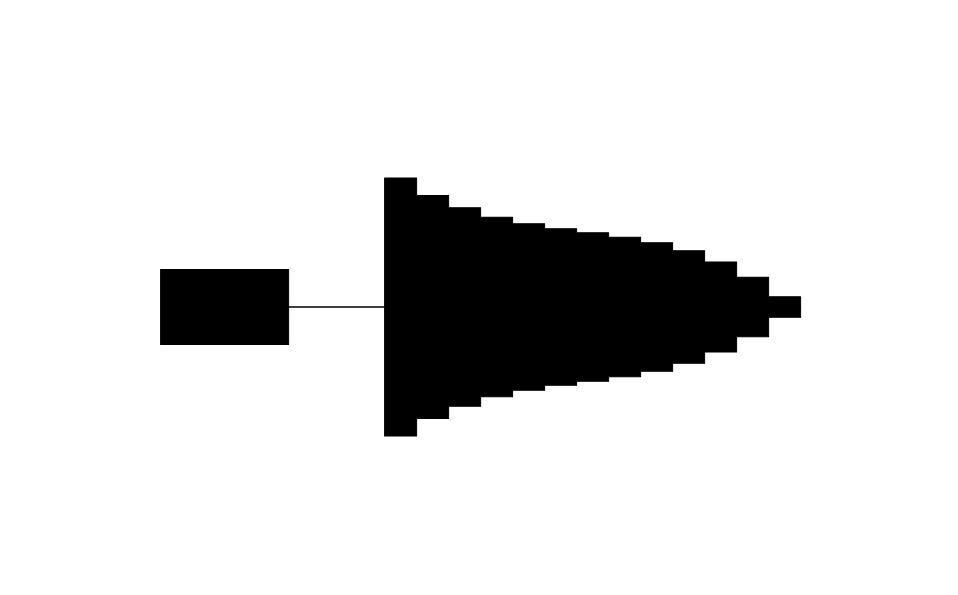## Seongyeol's Mask Image, for comparison
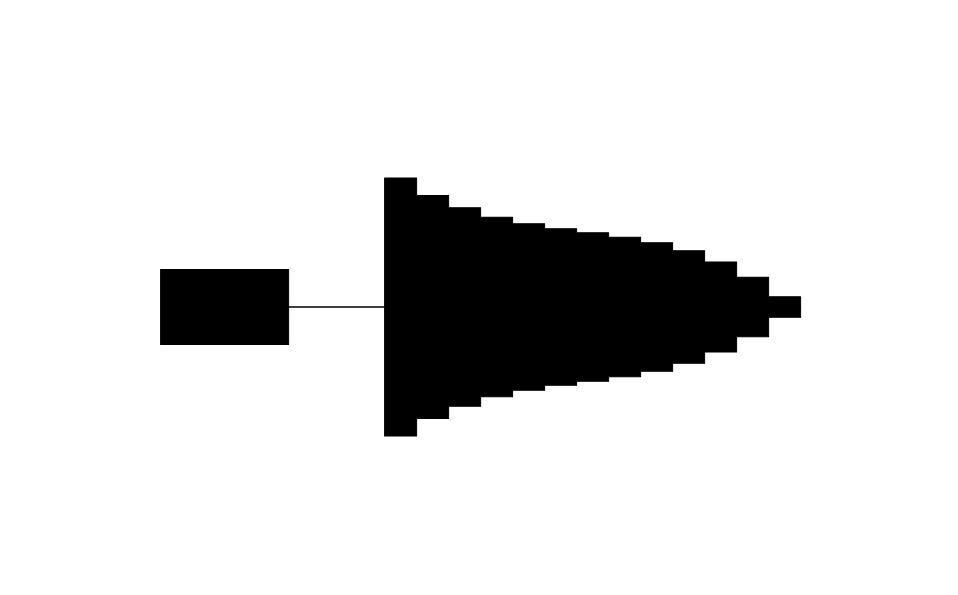

Then, later at step #442

Data extraction started
<KeysViewHDF5 ['Step#0', 'Step#1', 'Step#10', 'Step#100', 'Step#101', 'Step#102', 'Step#103', 'Step#104', 'Step#105', 'Step#106', 'Step#107', 'Step#108', 'Step#109', 'Step#11', 'Step#110', 'Step#111', 'Step#112', 'Step#113', 'Step#114', 'Step#115', 'Step#116', 'Step#117', 'Step#118', 'Step#119', 'Step#12', 'Step#120', 'Step#121', 'Step#122', 'Step#123', 'Step#124', 'Step#125', 'Step#126', 'Step#127', 'Step#128', 'Step#129', 'Step#13', 'Step#130', 'Step#131', 'Step#132', 'Step#133', 'Step#134', 'Step#135', 'Step#136', 'Step#137', 'Step#138', 'Step#139', 'Step#14', 'Step#140', 'Step#141', 'Step#142', 'Step#143', 'Step#144', 'Step#145', 'Step#146', 'Step#147', 'Step#148', 'Step#149', 'Step#15', 'Step#150', 'Step#151', 'Step#152', 'Step#153', 'Step#154', 'Step#155', 'Step#156', 'Step#157', 'Step#158', 'Step#159', 'Step#16', 'Step#160', 'Step#161', 'Step#162', 'Step#163', 'Step#164', 'Step#165', 'Step#166', 'Step#167', 'Step#168', 'Step#169', 'Step#17', 'Step#170', '

C:\Users\Captain\AppData\Local\Temp\ipykernel_4848\111126342.py:157: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  f = interp2d(Xedgesi, Yedgesi, H1, kind='cubic')
C:\Users\Captain\AppData\Local\Temp\ipykernel_4848\111126342.py:162: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
      

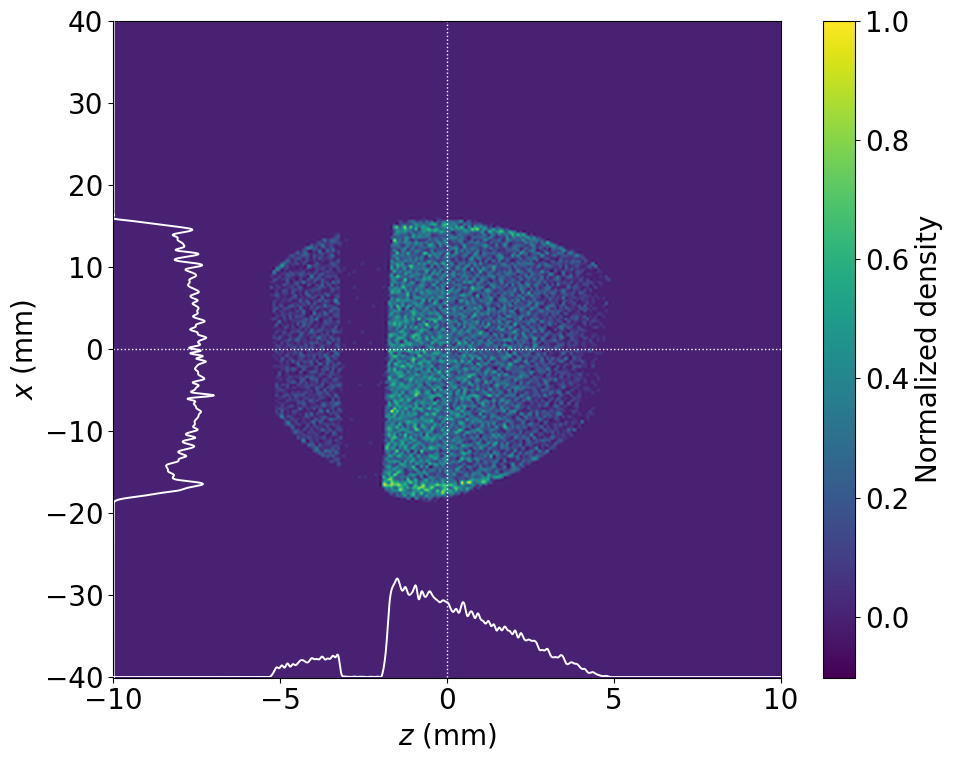

In [14]:
# =====================================================================
# =====================================================================
# LPS plotting
# =====================================================================
# =====================================================================
# LPS plotting
from IPython import get_ipython
get_ipython().run_line_magic('reset', '-sf')
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import matplotlib.gridspec as gridspec
from matplotlib.ticker import NullFormatter
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
nullfmt = NullFormatter()         # no labels

# Import OPAL output data
# =====================================================================
# =====================================================================
# Directory
parent_dir = "A://PBPL//"

# File name
opalout = "input.h5"

# Data extraction
print("Data extraction started")
dataopal = h5py.File(parent_dir+opalout, 'r+')
dataopal.keys()
print(dataopal.keys())

step=  442

# Grid size
grid_z = 10
grid_d = 40


print(dataopal["Step#0"].attrs['RefPartR'][2])
print(dataopal["Step#0"].attrs.keys())

# Stepsize repository
stepdirx  = 'Step#'+str(step)+'/x'
stepdiry  = 'Step#'+str(step)+'/y'
stepdirz  = 'Step#'+str(step)+'/z'
stepdirpx = 'Step#'+str(step)+'/px'
stepdirpy = 'Step#'+str(step)+'/py'
stepdirpz = 'Step#'+str(step)+'/pz'

# Access to attribute data
pRef = dataopal['Step#'+str(step)+'/'].attrs['RefPartP'][2]
zRef = dataopal['Step#'+str(step)+'/'].attrs['RefPartR'][2]
print("position z is "+str(zRef) + " m.")


# Beam data 
x = dataopal.get(stepdirx)
X = np.array(x)

y = dataopal.get(stepdiry)
Y = np.array(y)

z = dataopal.get(stepdirz)
z = np.array(z)
Z = z-np.mean(z)

T = Z / 3e8

px= dataopal.get(stepdirpx)
px= np.array(px)

py= dataopal.get(stepdirpy)
py= np.array(py)

pz= dataopal.get(stepdirpz)
pz= np.array(pz)

# Divergence
xp = np.array(px) / pRef
yp = np.array(py) / pRef

sigx = np.sqrt( np.mean( ((x - np.mean(x))**2 )))*1e3
sigy = np.sqrt( np.mean( ((y - np.mean(y))**2 )))*1e3
sigz = np.sqrt( np.mean( ((z - np.mean(z))**2 )))*1e3


mean_xz=(np.mean((x-np.mean(x)) * z))
mean_xpz=(np.mean((xp-np.mean(xp)) * z))

# Fractional energy spread
delta = (pz - pRef) /pRef
delta = (pz - np.mean(pz)) / np.mean(pz)

# RMS energy spread
sigd = np.sqrt( np.mean( ((delta - np.mean(delta))**2 )))
print("Data extraction completed")


# =====================================================================
# =====================================================================
# Emittance calculation
print("Emittance calculation started")
emitx = np.sqrt( np.mean((x-np.mean(x))**2)*np.mean((xp-np.mean(xp))**2) - np.mean((x-np.mean(x))*(xp-np.mean(xp)))**2)
emity = np.sqrt( np.mean((y-np.mean(y))**2)*np.mean((yp-np.mean(yp))**2) - np.mean((y-np.mean(y))*(yp-np.mean(yp)))**2)

# Normalized emittance
enx = emitx * pRef
eny = emity * pRef


# =====================================================================
# =====================================================================
# Linear Twiss parameters from this setting
betax = (sigx**2)*1e-6 / emitx # since sigx is in mm unit
betay = (sigy**2)*1e-6 / emity

alphax= - (np.mean((x-np.mean(x))*(xp-np.mean(xp)))) / emitx
alphay= - (np.mean((y-np.mean(y))*(yp-np.mean(yp)))) / emity


# =====================================================================
# =====================================================================
# Define the x and y data 
# For example just using random numbers
x = np.array(Z)*1e3
y = np.array(X)*1e3

# Estimate the 2D histogram
nbins = 251



# =====================================================================
# Mesh range for plotting
Xedges =  np.linspace(-grid_z, grid_z, nbins)
Yedges =  np.linspace(-grid_d, grid_d, nbins)

# 2D histogram: Initial processing
H, xedges, yedges = np.histogram2d(x,y,bins=(Xedges, Yedges))
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Noramalization
H1 = H / max(map(max, H))
print("Emittance calculation completed")

# =====================================================================
# Mesh range for interpolating
print("Interpolation started")
Xedgesi =  np.linspace(-grid_z, grid_z, nbins-1)
Yedgesi =  np.linspace(-grid_d, grid_d, nbins-1)

# Interpolation processing for 2D histogram
f = interp2d(Xedgesi, Yedgesi, H1, kind='cubic')

# New edges for interpolated data
Xedgesnew = np.linspace(-grid_z, grid_z, nbins*5)
Yedgesnew = np.linspace(-grid_d, grid_d, nbins*5)
H_interpolated = f(Xedgesnew, Yedgesnew)
# Normalization
H1_interpolated = H_interpolated / max(map(max, H_interpolated))
Xn, Yn = np.meshgrid(Xedgesnew, Yedgesnew)

# Projected histograms inx and y
hist_x, hist_y = H1_interpolated.sum(axis=0), H1_interpolated.sum(axis=1)

# Normalization
histx = hist_x / max(hist_x)
histy = hist_y / max(hist_y)

x_h = np.linspace(-grid_z, grid_z, len(Xn))
y_h = np.linspace(-grid_d, grid_d, len(Yn))
print("Interpolation completed")

# =====================================================================
# =====================================================================
# Plotting
print("Plotting started")

# Font size
fsize = 20
rc('figure', figsize = (10,8))
rc('axes', grid = False)
rc('lines', linewidth = 2, color = 'r')
rc('font', size = fsize)

# Image and histogram
fig, ax1 = plt.subplots()
#plt.text(-15, 0.6, r'$\mathrm{(c)}$', {'color': 'w', 'fontsize': 30})
plt.pcolormesh(Xn, Yn, H1_interpolated)
plt.plot([0,0],[-grid_d, grid_d], ':', linewidth=1.0, color=(1,1,1))
plt.plot([-grid_z, grid_z],[0,0], ':', linewidth=1.0, color=(1,1,1))
plt.set_cmap('viridis')
#plt.pcolormesh(Xn, Yn, data1)
plt.xlabel('$z$ (mm)', fontsize=fsize)
plt.ylabel('$x$ (mm)', fontsize=fsize)
#plt.ylabel('$x\'$ (mrad)', fontsize=fsize)
cbar = plt.colorbar()
#plt.clim([0.5,1])
cbar.ax.set_ylabel('Normalized density', fontsize=fsize)

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip1 = InsetPosition(ax1, [0.0, 0.001, 1.0, 0.3])
ax2.set_axes_locator(ip1)

# The data: only display for low temperature in the inset figure.
ax2.plot(x_h, histx/2, '-', linewidth=1.4, color=(1,1,1))
ax2.axis([-grid_z, grid_z, 0, 1])
ax2.axis('off')

# Create a set of inset Axes: these should fill the bounding box allocated to
# them.
ax3 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip3 = InsetPosition(ax1, [0.001, 0.0, 0.3, 1.0])
ax3.set_axes_locator(ip3)

# The data: only display for low temperature in the inset figure.
ax3.plot(histy/2, y_h, '-', linewidth=1.4, color=(1,1,1))
ax3.axis([0, 1, -grid_d, grid_d])
ax3.axis('off')
plt.tight_layout()
plt.show()

As compared to Seongyeol's output,

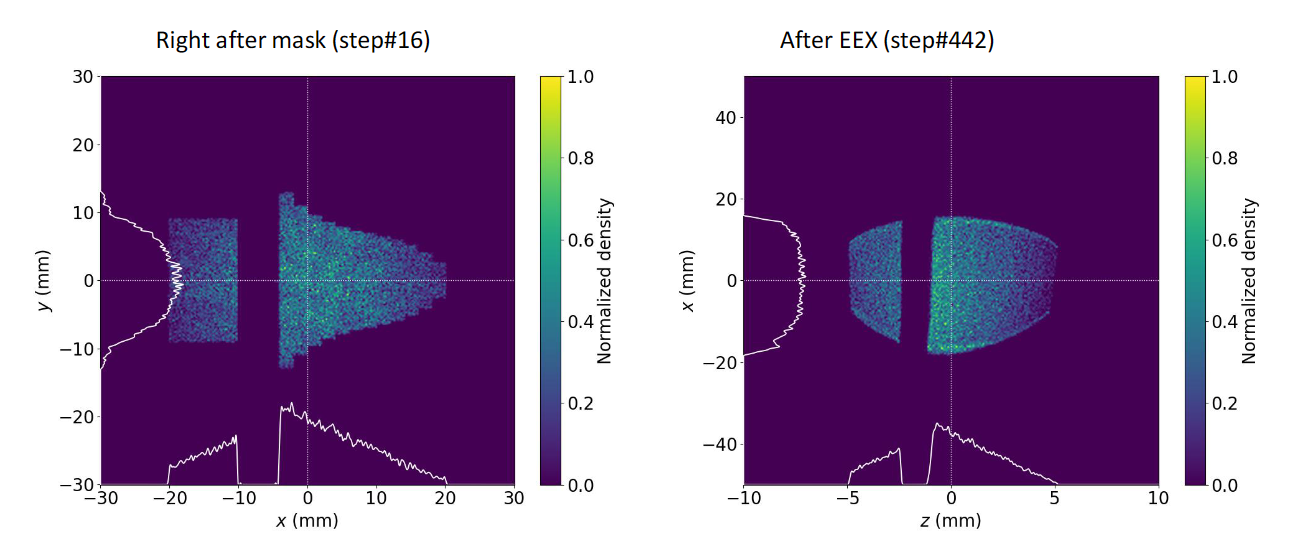